<a href="https://colab.research.google.com/github/fabiomiguell/AtividadesMackenzie/blob/main/Atividade_Trilha_6_Recup_Info_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Para o dataframe
import pandas as pd

# Para o gráfico
import matplotlib.pyplot as plt
import seaborn as sns

# Para stopwords
import nltk

%matplotlib inline 


In [2]:
import urllib.request  

texto = []

for line in urllib.request.urlopen ('https://raw.githubusercontent.com/fabiomiguell/AtividadesMackenzie/main/Articulistas_Alexandre%20Garcia.txt'): 
    texto.append(line.decode('utf-8'))

sinais = ['\n', '.', ',', '(', ')', '?', '!', '\'', '[', ']', ';', ':', '\\', '"', '"}', '}' 'ue', 'q', 'u', 'm', 'ma', 'neo', 'co', 'coo', 'ais']

for i in range(len(texto)):
  for j in sinais:
    texto[i] = texto[i].lower() # Mantendo o texto em letra minúscula
    texto[i] = texto[i].replace(j,'') # Retirando todos os sinais
    texto[i] = ''.join([i for i in texto[i] if not i.isdigit()]) # Retirando os dígitos

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
texto2 = ''.join(texto).split() # Unindo as frases e separando por palavras

stopwordsnltk = nltk.corpus.stopwords.words('portuguese') # Extraindo as Stopwords do NLTK
texto3 = [palavra for palavra in texto2 if palavra not in stopwordsnltk] # Retirando as Stopwords

print(texto3)

['{athor', 'alexandre', 'garcia', 'title', 'nfs', 'le', 'ntent', 'npor', 'iage', 'nbrasil', 'exterior', 'teo', 'deterioradan', 'pergnta', 'fizera', 'palestra', 'agora', 'sobre', 'nicaeeo', 'estrategica', 'ofici', 'speriores', 'ireo', 'andar', 'nidades', 'exercito', 'paedsnos', 'inistros', 'agricltra', 'triso', 'rece-chegados', 'renifes', 'g', 'g', 'roa', 'ficara', 'ipresseo', 'iage', 'brasil', 'nnca', 'teo', 'rino', 'inistro', 'gilson', 'achado', 'leva', 'desaforo', 'casa', 'prepara', 'ntra-ofensiva', 'bo', 'noe', 'paeds', 'iage', 'negativa', 'teos', 'tantos', 'dados', 'positivos', 'ostrar', 'ndo', 'estaredaos', 'esndendo', 'bo', 'ostrando', 'ri', 'orige', 'dessa', 'propaganda', 'negativa', 'poledtica', 'ercialnos', 'pretende', 'atingir', 'governo', 'atinge', 'tabe', 'paeds', 'jej', 'lei', 'roanet', 'ajda', 'trbinar', 'capanha', 'divergeancia', 'ideolfgica', 'ove', 'tea', 'pejo', 'falar', 'al', 'paeds', 'nascera', 'passando', 'cia', 'princedpio', 'patriotiso', 'gente', 'pode', 'falar',

In [5]:
contaPalavra = {}

# Contando as palavras
for i in texto3:
  contaPalavra[i] = texto3.count(i)

print(contaPalavra)

{'{athor': 87, 'alexandre': 127, 'garcia': 121, 'title': 87, 'nfs': 27, 'le': 15, 'ntent': 87, 'npor': 4, 'iage': 6, 'nbrasil': 1, 'exterior': 7, 'teo': 14, 'deterioradan': 1, 'pergnta': 5, 'fizera': 10, 'palestra': 3, 'agora': 51, 'sobre': 65, 'nicaeeo': 2, 'estrategica': 4, 'ofici': 1, 'speriores': 1, 'ireo': 1, 'andar': 5, 'nidades': 1, 'exercito': 6, 'paedsnos': 2, 'inistros': 11, 'agricltra': 7, 'triso': 3, 'rece-chegados': 1, 'renifes': 1, 'g': 4, 'roa': 7, 'ficara': 9, 'ipresseo': 2, 'brasil': 87, 'nnca': 11, 'rino': 1, 'inistro': 36, 'gilson': 1, 'achado': 1, 'leva': 6, 'desaforo': 1, 'casa': 32, 'prepara': 1, 'ntra-ofensiva': 2, 'bo': 17, 'noe': 15, 'paeds': 87, 'negativa': 2, 'teos': 17, 'tantos': 3, 'dados': 4, 'positivos': 2, 'ostrar': 5, 'ndo': 49, 'estaredaos': 1, 'esndendo': 1, 'ostrando': 6, 'ri': 11, 'orige': 8, 'dessa': 8, 'propaganda': 6, 'poledtica': 30, 'ercialnos': 1, 'pretende': 3, 'atingir': 3, 'governo': 60, 'atinge': 4, 'tabe': 47, 'jej': 1, 'lei': 44, 'roanet

In [6]:
pd.set_option('display.max_rows', None) # Para visualizar todas as linhas do Dataframe
df = pd.DataFrame(list(contaPalavra.items()), columns=['Palavra', 'Quantidade']) # Criando um Dataframe
df = df.sort_values(by='Quantidade', ascending=False, ignore_index=True) # Ordenando de forma decrescente o Dataframe pela coluna Quantidade 
df = df[df['Quantidade']>50] # Filtrando a coluna Quantidade para valores maiores que 50
df.head(20)

,Palavra,Quantidade
0,presidente,133
1,alexandre,127
2,garcia,121
3,anos,99
4,je,98
5,ne,97
6,n,91
7,{athor,87
8,},87
9,brasil,87


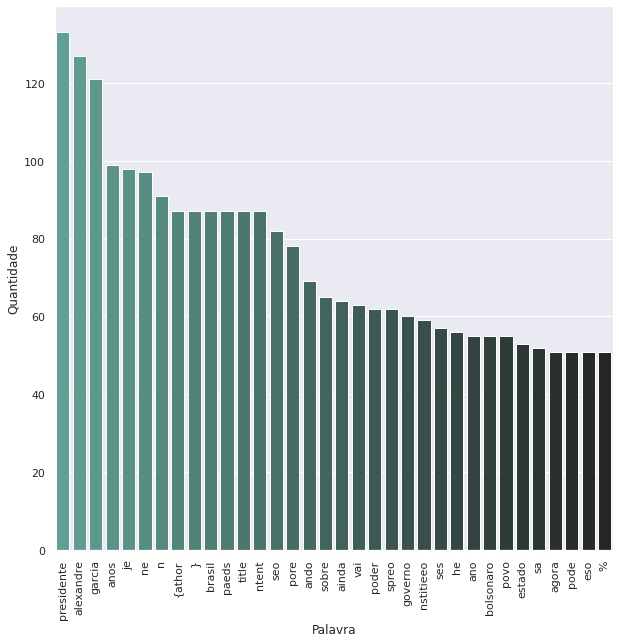

In [7]:
sns.set_theme(style='darkgrid') # Definindo a cor de fundo
plt.figure(figsize=(10,10)) # Definindo o tamanho do Dataframe
sns.barplot(x='Palavra', y='Quantidade', data=df, palette='dark:#5A9_r') # Definindo os dados dos eixos x e y e a cor das barras
plt.xticks(rotation=90) # Alterando a posição dos nomes no gráfico
plt.show() # Plotando o gráfico